### Author: Christopher Rossi
### Student Number: 190394110
### Date: 2022-02-36

# 1 Concept Questions:

---

## 1.1 Neural Nets:

1. What is the output P (y = 1|x, w) from the above neural net? Express it in terms of xi, c and weights wi (2 points).

= g(z) 

= $\frac{1}{1+e^{-z}}$

= g($w_{7} + w_{8}h(w_{1} + w_{3}x_{1} + w_{5}x_{2}) + w_{9}h(w_{2} + w_{4}x_{1} + w_{6}x_{2}))$ 

= $\frac{1}{1 + exp(−(w_{7} + cw_{8}w_{1} + cw_{9}w_{2} + (cw_{8}w_{3} + cw_{9}w_{4})x_{1} + (cw_{8}w_{5} + cw_{9}w_{6})x_{2}))}$

---
2. Is it true that any multi-layered neural net with linear activation functions at hidden layers can be represented as a
neural net without any hidden layer? Briefly explain your answer (1 point).

Yes, any multi-layered neural net with linear activation functions at hidden layers can be represented as a neural net without any hidden layer. Because the output from the hidden units with linear activation functions can be written as linear combinations of input features. Then we simply find an equivalent neural net without any hidden layers since we use these outputs as inputs for the final layer.

---

## 1.2 Support Vector Machines:
1. How large can h ≥0 be so the training examples are still linearly separable (1 point)?

###### The largest possible value h will be is 1, this is due to the fact that it will cross into the minimum range blue can have, and in this case since blue is two points, we can determine that this area by finding the linear line that crosses two points. This, by looking at the value of the line at y = 1, we can see that 1 is the limit for h.
---

2. Will the direction of the maximum margin decision boundary change as a function of h when the samples are separable?
Explain your answer with one sentence (1 point).

Nope, it will not.

---

3. What will be the margin obtained by the maximum margin boundary as a function of h? Note that the margin as a function of h is actually a linear function (2 points).

The margin ill be obtained by the maximum margin boundary as the function of h is $\frac{1-h}{\sqrt{2}}$, and when 0 <= h <= 1 and 0, in addition to when h > 1. Thus, these functions can be found by calculating the margin when h = 0, which is $\frac{1}{\sqrt{2}}$ and h = 1 (that is 0)

---


In [ ]:
!pip install tensorflow
!pip install keras

     |████████████████████████████████| 462 kB 26.6 MB/s 


In [ ]:
from gc import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


datagen = ImageDataGenerator(
    zoom_range=0.2,          # Zooming rate of the image
    horizontal_flip=True,    # Make a horizontal copy
    rescale=1./255.0,        # Normalize the new images
    width_shift_range=0.10,  # Percentage of width shifting
    height_shift_range=0.10, # Percentage of height shifting
)

train_datagen = datagen.flow_from_directory('/content/drive/MyDrive/xray_dataset_covid19/train')
test_datagen = datagen.flow_from_directory('/content/drive/MyDrive/xray_dataset_covid19/test')

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/xray_dataset_covid19/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/xray_dataset_covid19/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

#model.summary()


#model.summary()

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

callback = EarlyStopping(patience=6)

model.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[callback]
    )

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
5/5 [==============================] - 9s 2s/step - loss: 0.7352 - accuracy: 0.4730 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 7s 2s/step - loss: 0.6867 - accuracy: 0.5000 - val_loss: 0.6767 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 7s 1s/step - loss: 0.6710 - accuracy: 0.5000 - val_loss: 0.6389 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 0.6405 - accuracy: 0.5000 - val_loss: 0.5619 - val_accuracy: 0.5750
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.5760 - accuracy: 0.6622 - val_loss: 0.4651 - val_accuracy: 0.6500
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.5130 - accuracy: 0.7365 - val_loss: 0.4013 - val_accuracy: 0.5750
Epoch 7/20
5/5 [

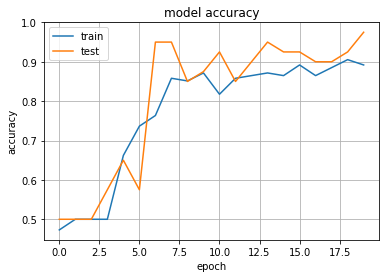

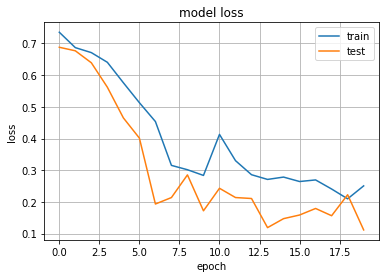

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.grid(True)
plt.show()

When we look at the results of our experiment, we can see that overfitting does not occur and that our accuracy follows a positive expoential movement. The meaning of the accuracy score matches the expected values. In addition, the loss graph shows a negative trend, meaing that our model is close to the real values. The training and testing data are closely related and each data value is not influencing the overall model, and as such, you would see that the model will circum to overfitting. Therefore, since our model shows a positive movement in terms of accuracy, negative trend for the loss values, and the training/testing data are closely intertwined to each other meaning that the model will have limited overfitting potential. 